In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
train_path = 'train_catdog'  # Folder Names are Parasitized and Uninfected
training_names = os.listdir(train_path)

In [3]:
image_paths = []
image_classes = []
class_id = 0

In [4]:
def imglist(path):    
    return [os.path.join(path, f) for f in os.listdir(path)]

In [5]:
for training_name in training_names:
    dir = os.path.join(train_path, training_name)
    class_path = imglist(dir)
    image_paths+=class_path
    image_classes+=[class_id]*len(class_path)
    class_id+=1

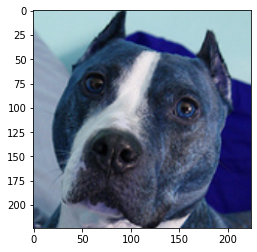

In [23]:
des_list = []

#BRISK is a good replacement to SIFT. ORB also works but didn;t work well for this example
brisk = cv2.BRISK_create(30)
im=cv2.imread(image_paths[5])
im1=cv2.imread(image_paths[5])
im2=cv2.imread(image_paths[5])
im3=cv2.imread(image_paths[5])
im4=cv2.imread(image_paths[5])

plt.imshow(im1)


In [7]:
def draw_keypoints(vis, keypoints, color = (0, 255, 255)):
    for kp in keypoints:
            x, y = kp.pt
            plt.imshow(cv2.circle(vis, (int(x), int(y)), 2, color))
    return cv2.circle(vis, (int(x), int(y)), 2, color)

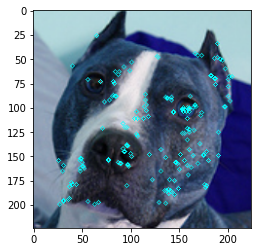

In [8]:
kpts, des = brisk.detectAndCompute(im1, None)
img1=draw_keypoints(im1,kpts)
img1= np.array(img1, dtype='int')

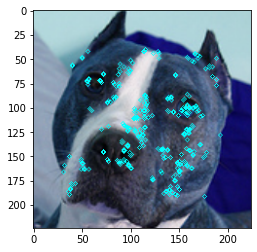

In [9]:
orb=cv2.ORB_create()

kp_orb = orb.detect(im2,None)
kp_orb, des_orb = orb.compute(im2, kp_orb)
img2=draw_keypoints(im2,kp_orb)
img2= np.array(img2, dtype='int')

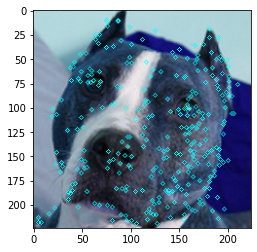

In [10]:
 # SIFT extraction
sift = cv2.xfeatures2d.SIFT_create()
kp_sift, descriptors = sift.detectAndCompute(im3,None)
img3=draw_keypoints(im3,kp_sift)
img3= np.array(img3, dtype='int')

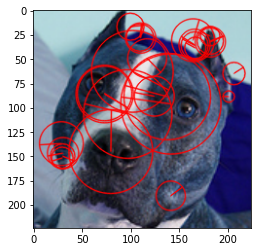

In [25]:
surf = cv2.xfeatures2d.SURF_create(5000)
kp_surf, descriptors = surf.detectAndCompute(im4,None)
img4 = cv2.drawKeypoints(im4,kp_surf,None,(255,0,0),4)
plt.imshow(img4),plt.show()
img4= np.array(img4, dtype='int')

# img4=draw_keypoints(im4,kp_surf)


In [30]:
images = [[im],[img1],[img2],[img3],[img4]]

In [37]:
def plot_many(images, title, title_values=["normal","BRISK","ORB","SIFT","SURF"]):
    cols = 5
    rows = 1

    fig = plt.figure(figsize=(10,8))
    for i in range(cols*rows):
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(np.squeeze(images[i]))
        plt.axis(False)
        plt.title(title+'='+str(title_values[i]),fontsize=10)
    plt.tight_layout()
    plt.show()



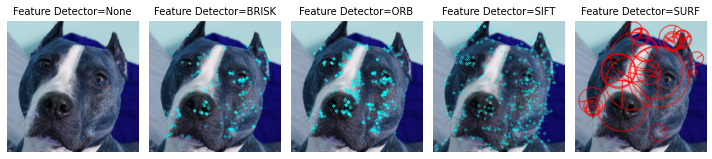

In [38]:
plot_many(images, "Feature Detector", ["None","BRISK","ORB","SIFT","SURF"])